In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [14]:
# Load the original MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [15]:
# generate distorted image and print the first 5 result
def generate_distorted_image(x_train):
    # Define the parameters for the distortion
    shrink_range = (0.3, 0.7)
    rotation_range = (-45, 45)
    translation_range = (-0.3, 0.3)
    # Create a loop to generate a new dataset
    num_images = len(x_train)
    distorted_images = np.zeros((num_images, 28, 28))
    for i in range(num_images):
        # Select an image
        image = x_train[i]

        # Generate random values for the distortions
        shrink_factor = np.random.uniform(*shrink_range)
        rotation_angle = np.random.uniform(*rotation_range)
        translation_distance = np.random.uniform(*translation_range, size=2)

        # Apply the distortions
        new_image = np.zeros((28, 28))
        for x in range(28):
            for y in range(28):
                # Calculate the coordinates of the original pixel in the distorted image
                x_original = int((x-13)/shrink_factor + 13)
                y_original = int((y-13)/shrink_factor + 13)

                # Check if the pixel is within the bounds of the original image
                if (x_original >= 0 and x_original < 28 and y_original >= 0 and y_original < 28):
                    # Calculate the angle of rotation and the translation for the pixel
                    angle = np.radians(rotation_angle)
                    dx = int(x_original - 13)
                    dy = int(y_original - 13)
                    dx_prime = dx*np.cos(angle) - dy*np.sin(angle) + translation_distance[0]*28
                    dy_prime = dx*np.sin(angle) + dy*np.cos(angle) + translation_distance[1]*28

                    # Calculate the coordinates of the pixel in the original image
                    x_distorted = int(dx_prime + 13)
                    y_distorted = int(dy_prime + 13)

                    # Check if the pixel is within the bounds of the distorted image
                    if (x_distorted >= 0 and x_distorted < 28 and y_distorted >= 0 and y_distorted < 28):
                        # Copy the pixel from the original image to the distorted image
                        new_image[x, y] = image[x_distorted, y_distorted]

        # Add the distorted image to the new dataset array
        distorted_images[i] = new_image

        # Print and show the first 5 original and distorted images side-by-side
        if i < 5:
            fig, ax = plt.subplots(1, 2, figsize=(6, 3))
            ax[0].imshow(x_train[i], cmap='gray')
            ax[0].set_title('Original')
            ax[0].set_xticks([])
            ax[0].set_yticks([])
            ax[1].imshow(new_image, cmap='gray')
            ax[1].set_title('Distorted')
            ax[1].set_xticks([])
            ax[1].set_yticks([])
            plt.tight_layout()
            plt.show()

    return distorted_images

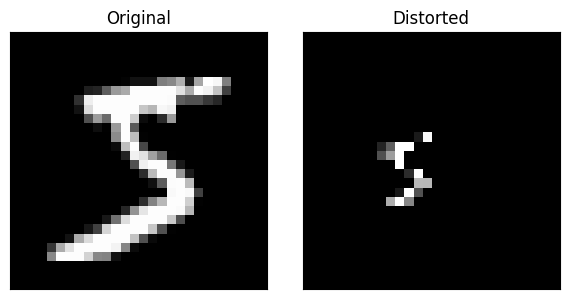

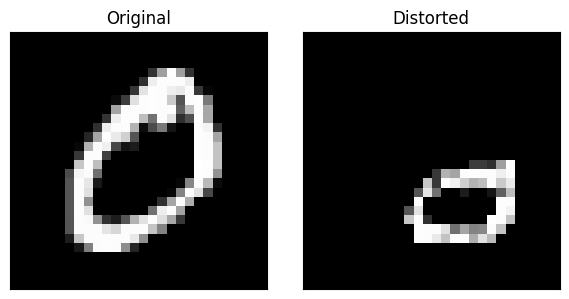

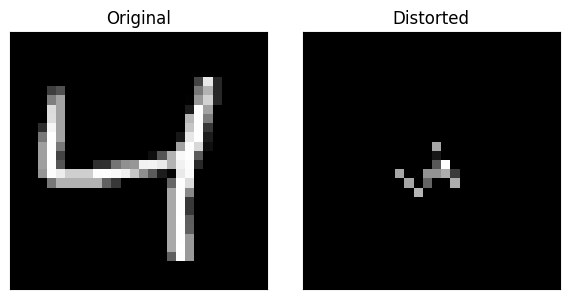

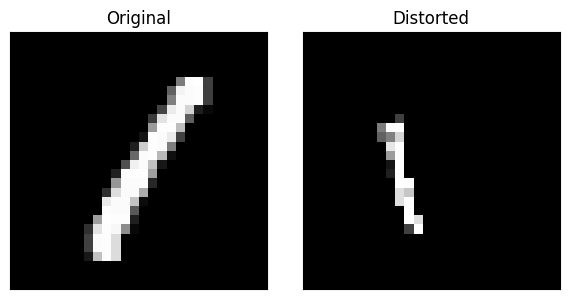

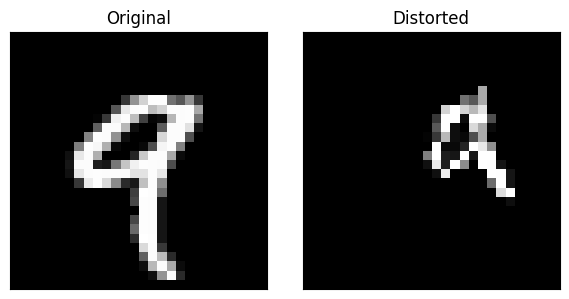

In [16]:
# call generate_distorted_image with the train data
distorted_images = generate_distorted_image(x_train)

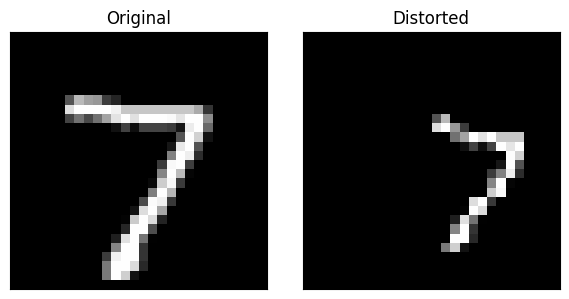

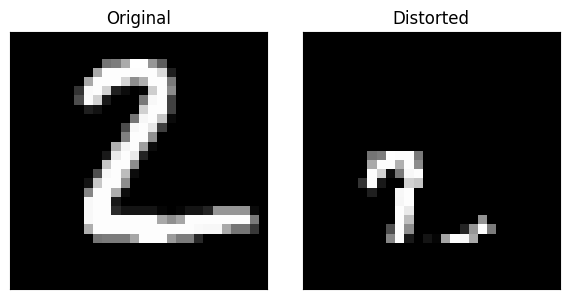

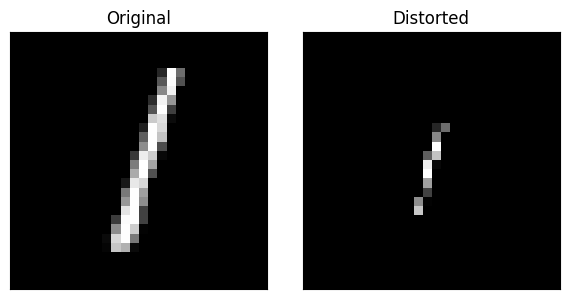

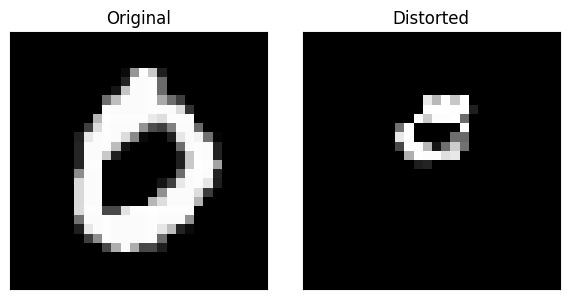

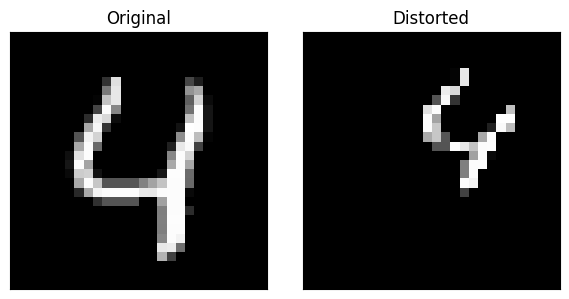

In [17]:
# call generate_distorted_image with the test data
distorted_images_test = generate_distorted_image(x_test)

In [18]:
# Save the new dataset
#np.savez('distorted_mnist.npz', x=distorted_images, y=y_train)
np.savez('distorted_mnist.npz', x_train=distorted_images, y_train=y_train, x_test=distorted_images_test, y_test=y_test)